In [1]:
#Imports
import json
import numpy as np
import pandas as pd
import csv
import os
from math import log
from pylab import lstsq
from pylab import matrix
from pylab import exp
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#encodes a dictionary into a jason
class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)


def jasonGenerator(path,results,photo_name):
    """ Generates a .jason file in the path given folder from the a dictionary """
    with open(path + '/analysis_result_' + photo_name + '.json',"w") as miarch:
        miarch.write(json.dumps(results, cls=NumpyEncoder))

In [3]:
def jasonReader(path):
    """ Reads the .jason generated with jasonGenartor the given path"""
    with open(path,'r') as miarch:
        loaded_dict = json.loads(miarch.read())
    return loaded_dict

In [4]:
def slicesParser_max_peaksI(dictres):
#extract all the slices data
    allSlices = dictres['slices']
    #seting columns names
    column_names = ['transient' + str(x) for x in range(0,len(allSlices[0]['max_peaks_intensities']))]    
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    for i in range(0,len(allSlices)):
        df_sum.loc[i] = allSlices[i]['max_peaks_intensities'][0:] 
    return df_sum

In [5]:
def slicesParser_halfpeakstime(dictres):
    #extract all the slices data
    allSlices = dictres['slices']
    
    #seting columns names
    column_names = ['transient' + str(x+1) for x in range(0,len(allSlices[0]['times_to_half_peaks']))]
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    #populating the dataframe
    for i in range(0,len(allSlices)):
        df_sum.loc[i+1] = allSlices[i]['times_to_half_peaks']
    return df_sum

In [6]:
def slicesParser_amplitudes(dictres):
    #extract all the slices data
    allSlices = dictres['slices']
    #seting columns names
    column_names = ['transient' + str(x+1) for x in range(0,len(allSlices[0]['amplitudes']))]
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    #populating the dataframe
    for i in range(0,len(allSlices)):
        df_sum.loc[i+1] = allSlices[i]['amplitudes']

    return df_sum

In [7]:
def slicesParser_min_peaksI(dictres):
    #extract all the slices data
    allSlices = dictres['slices']
    #seting columns names
    column_names = ['transient' + str(x+1) for x in range(0,len(allSlices[0]['min_peaks_intensities']))]
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    #populating the dataframe
    for i in range(0,len(allSlices)):
        df_sum.loc[i+1] = allSlices[i]['min_peaks_intensities']

    return df_sum

In [8]:
def slicesParser_peaktime(dictres):
    #extract all the slices data
    allSlices = dictres['slices']

    #seting columns names
    column_names = ['transient' + str(x+1) for x in range(0,len(allSlices[0]['times_to_peaks']))]
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    #populating the dataframe
    for i in range(0,len(allSlices)):
        df_sum.loc[i+1] = allSlices[i]['times_to_peaks']

    return df_sum

In [16]:
# Calcula el alternance ratio

AR_list = []
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/jsons/'
jsons_list = os.listdir(path)
for file in jsons_list:
    path_file = path + file
    dic = jasonReader(path_file)
    slices = dic['slices']
    i = 0
    df = pd.DataFrame(columns=['transient1','transient2','local AR'])
    for i in range(0,33):
        try:
            amps = slices[i]['amplitudes'][0:2]
            amps.append((max(amps)-min(amps))/max(amps))
            i += 1
            df.loc[len(df)] = amps
        except IndexError:
            pass
    df.to_csv('/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/ARs/' + file[:-5] + '.csv', sep='\t')
print('Done')

Done


In [20]:
# Guarda en tablas separadas los datos de cada json por parámetro

param_list = ['max_peaks_positions','min_peaks_positions','max_peaks_intensities','min_peaks_intensities','amplitudes','times_to_peaks','times_to_half_peaks','tau_s']
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/jsons/'
path2 = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/json_nuevos/'
for param in param_list:
    os.makedirs(path + param + '/')
    jsons_list = os.listdir(path)
    for file in jsons_list:
        try:
            print (file)
            path_file = path + file
            dic = jasonReader(path_file)
            slices = dic['slices']
            i = 0
            df = pd.DataFrame(columns=['transient1','transient2'])
            for i in range(0,33):
                try:
                    amps = slices[i][param][0:2]
                    i += 1
                    df.loc[len(df)] = amps
                except IndexError:
                    pass
            df.to_csv(path + param + '/' + file + param + '.csv', sep='\t')
        except IsADirectoryError:
            pass
    print('Done')

311019_analysis_result_vk2b000.json
171019_analysis_result_c1c000.json
230819VK1_analysis_result_vk1c000.json
200121_analysis_result_vk2b000.json
030321_analysis_result_D6c000.json
050320c8_analysis_result_8b000.json
050320c7_analysis_result_7d001.json
240221_analysis_result_D1a000.json
170221_analysis_result_D1b000.json
240221_analysis_result_V2b000.json
060121_analysis_result_vk12a000.json
031019c4_analysis_result_c4c000.json
171019_analysis_result_vk3b000.json
170221_analysis_result_V1b000.json
180221_analysis_result_vk2b000.json
050320c6_analysis_result_6d001.json
200121_analysis_result_c3a000.json
180221_analysis_result_d2d000.json
071119c1sel_analysis_result_c1c002.json
220119VK1uM_analysis_result_vk2a000.json
060121_analysis_result_vk2c001.json
050320c6_analysis_result_6b001.json
240221_analysis_result_C2d000.json
030321_analysis_result_C4d000.json
060320_analysis_result_vk3b001.json
240221_analysis_result_C2c000.json
010719ctrol8_analysis_result_ctrol8b0.json
060320_analysis_re

In [24]:
# Guarda en una tabla los datos de la célula entera

path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/jsons/'
path2 = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/jsons/'
jsons_list = os.listdir(path)
os.makedirs(path2 + 'whole_cell/')
for file in jsons_list:
    try:
        path_file = path + file
        dic = jasonReader(path_file)
        dic = dic['image']
        pairs = {k: dic[k] for k in list(dic)[1:]}
        keys = list(pairs.keys())
        df = pd.DataFrame()
        for label in range(0,len(pairs)):
            df[keys[label]] = pairs[keys[label]][0:2]
        df = df.T
        df.columns = ['Transient1', 'Transient2']
        df.to_csv(path2 + 'whole_cell/' + file + '.csv', sep='\t')
    except IsADirectoryError:
        pass
print('Done')

Done


### Parseo de tablas de TAU

In [34]:
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/'
experiments = os.listdir(path + 'tau_s/')
taus_exp = pd.DataFrame()
for i in range(0,len (experiments)):
    experiment = experiments[i]
    tau_file = pd.read_csv(path + 'tau_s/' + experiment, sep='\t')
    del tau_file['Unnamed: 0']
    tau_file = tau_file[(tau_file > 0)&(tau_file < 1000)]
    taus_exp[experiment] = list(tau_file.mean())
local_taus_mean = taus_exp.T
local_taus_mean.columns = ['transient1','transient2']
local_taus_mean['file'] = local_taus_mean.index
local_taus_mean = local_taus_mean.reset_index(drop=True)

In [42]:
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/'
experiments = os.listdir(path + 'amplitudes/')
amp_exp = pd.DataFrame()
for i in range(0,len (experiments)):
    experiment = experiments[i]
    amp_file = pd.read_csv(path + 'amplitudes/' + experiment,sep='\t')
    del amp_file['Unnamed: 0']
    amp_exp[experiment] = list(amp_file.mean())
local_amp_mean = amp_exp.T
local_amp_mean.columns = ['transient1','transient2']
local_amp_mean['file'] = local_amp_mean.index
local_amp_mean = local_amp_mean.reset_index(drop=True)

In [11]:
hist=np.histogram(sample,bins=30)

NameError: name 'sample' is not defined

In [35]:
local_taus_mean.describe()

,transient1,transient2
count,578.000000,578.000000
mean,111.941969,105.580131
std,101.768765,93.502697
min,2.547817,3.638898
25%,46.675494,46.045195
50%,80.384768,80.133866
75%,152.996609,138.863896
max,774.223199,723.536604


In [24]:
tau_file = pd.read_excel(path + 'wc_tau_preliminar.xlsx')
del tau_file['Unnamed: 0']

In [25]:
amp_file = pd.read_excel(path + 'amplitudes_wc_norm.xlsx')
del amp_file['Unnamed: 0']
del amp_file['Unnamed: 0.1']

In [162]:
tau_file.head()

,transient1,transient2,file
0,56.642803,50.441796,010719ctrol1_analysis_result_ctrol1a0.json
1,21.848068,22.281768,010719ctrol1_analysis_result_ctrol1b0.json
2,17.606736,17.085831,010719ctrol8_analysis_result_ctrol8a0.json
3,108.615258,95.514131,010719ctrol8_analysis_result_ctrol8b0.json
4,65.503319,55.030121,010719Dan2_analysis_result_dan2a000.json


## Normaliza el tau con la amplitud

In [43]:
tau_norm = []
for i in range(0,len(local_amp_mean)):
    file = local_amp_mean['file'][i].replace('..xlsx', '').split('_')
    filtro_df1 = local_amp_mean[(local_amp_mean['file'].str.contains(file[0]) == True) & (local_amp_mean['file'].str.contains(file[1]) == True)]
    filtro_df2 = local_taus_mean[(local_taus_mean['file'].str.contains(file[0]) == True) & (local_taus_mean['file'].str.contains(file[1]) == True)]
    tau_norm1 = float(filtro_df2 ['transient1'])/float(filtro_df1 ['transient1'])
    tau_norm2 = float(filtro_df2 ['transient2'])/float(filtro_df1 ['transient2'])
    list_tau_norm = [file[0]+'_'+file[1], tau_norm1, tau_norm2]
    tau_norm.append(list_tau_norm)
local_tau_norm = pd.DataFrame(tau_norm, columns = ['file','transient1','transient2'])

TypeError: cannot convert the series to <class 'float'>

In [37]:
wc_tau_norm = []
for i in range(0,len(amp_file)):
    try:
        cel = amp_file['célula'][i]
        photo = amp_file['foto'][i]
        filtro_df1 = amp_file[(amp_file['célula'].str.contains(cel) == True) & (amp_file['foto'].str.contains(photo) == True)]
        filtro_df2 = tau_file[(tau_file['file'][i].str.contains(cel) == True) & (tau_file['file'][i].str.contains(photo) == True)]
        tau_norm1 = float(filtro_df2 ['WC_norm_T1'])/float(filtro_df1 ['WC_norm_T1'])
        tau_norm2 = float(filtro_df2 ['WC_norm_T2'])/float(filtro_df1 ['WC_norm_T2'])
        list_tau_norm = [cel+'_'+photo, tau_norm1, tau_norm2]
        wc_tau_norm.append(list_tau_norm)
    except:
        pass
wc_tau_norm = pd.DataFrame(wc_tau_norm, columns = ['file','transient1','transient2'])

In [38]:
wc_tau_norm

,file,transient1,transient2


In [176]:
tabulado = pd.read_csv(path + 'tabulado')
del tabulado['Unnamed: 0']

In [129]:
tabulado.head()

,experimento,célula,foto,tratamiento,frecuencia
0,010719SEL,010719ctrol1,ctrol1b0.tif,C,1
1,010719SEL,010719ctrol1,ctrol1a0.tif,C,5
2,010719SEL,010719VK3,vk3b002.tif,VK,5
3,010719SEL,010719VK3,vk3a000.tif,VK,1
4,010719SEL,010719VK7,vk7b000.tif,VK,1


In [29]:
# Filtrado por tratamiento y frecuencia

def tau_filter(tratamiento,frecuencia,df):
    tabulado_filter = tabulado[(tabulado['tratamiento']==tratamiento) & (tabulado['frecuencia']== frecuencia)].reset_index(drop=True)
    tau = pd.DataFrame(columns = ['transient1','transient2','file'])
    for j in range(0,len (tabulado_filter)):
        celula = tabulado_filter['célula'][j]
        foto = tabulado_filter['foto'][j][:-4]
        for i in range(0,len (df)):
            if (celula in df['file'][i]) & (foto in df['file'][i]):
                tau.loc[j] = df.loc[i]
    return tau

In [30]:
def outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    idx = ~((column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR)))
    return idx

In [144]:
tau_norm1C = tau_filter('C',1,local_tau_norm)
tau_norm5C = tau_filter('C',5,local_tau_norm)
print(scipy.stats.ttest_ind(tau_norm1C['transient1'],tau_norm5C['transient1']))
print(scipy.stats.shapiro(tau_norm1C['transient1']))
print(scipy.stats.kstest(tau_norm1C['transient1'],tau_norm5C['transient1']))

Ttest_indResult(statistic=1.3305712486811097, pvalue=0.18882061270551725)
ShapiroResult(statistic=0.8669856190681458, pvalue=0.0020997710525989532)
KstestResult(statistic=0.25862068965517243, pvalue=0.2506790443892716)


In [32]:
tratamiento = ['C','VK','DAN']
frecuencia = [1,5]
df_list = []
for t in tratamiento:
    for f in frecuencia:
        tau_control = tau_filter(t,f,local_taus_mean)
        wc_tau_control = tau_filter(t,f,tau_file)
        diff_result = pd.DataFrame(columns=['delta_transient1','delta_transient2','file'])
        delta_transient1 = []
        delta_transient2 = []
        file = []
        for i in wc_tau_control['file'].tolist():
            filtro_df2 = wc_tau_control[(wc_tau_control['file'].str.contains(i) == True)]
            filtro_df1 = tau_control[tau_control['file'].str.contains(i) == True]
            delta_transient1.append(float((filtro_df2['transient1'] -filtro_df1['transient1'])/filtro_df1['transient1']))
            delta_transient2.append(float((filtro_df2['transient2'] -filtro_df1['transient2'])/filtro_df1['transient2']))
            file.append(i)
        diff_result['delta_transient1'] = delta_transient1
        diff_result['delta_transient2'] = delta_transient2
        diff_result['file'] = file
        # Replacing infinite with nan 
        diff_result.replace([np.inf, -np.inf], np.nan, inplace=True) 
        # Dropping all the rows with nan values 
        diff_result.dropna(inplace=True)
        # Printing df 
        diff_result = diff_result[(diff_result['delta_transient1'] < 100) & (diff_result['delta_transient1'] > -50) & (diff_result['delta_transient2'] < 50) & (diff_result['delta_transient2'] > -100)]
        df_list.append(diff_result)

In [145]:
df = pd.concat ([tau_norm1C['transient1'],tau_norm5C['transient1']], axis=1, sort=False, keys=['1Hz', '5Hz'])

<AxesSubplot:>

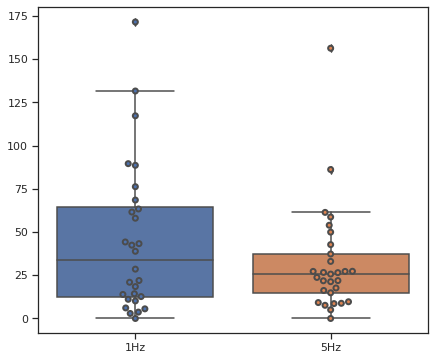

In [146]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))


sns.boxplot(data=df)

sns.swarmplot(data=df, linewidth=2)
# plt.savefig('AR')

In [32]:
tratamiento = ['C','VK','DAN']
frecuencia = [1,5]
df_list = []
for t in tratamiento:
    for f in frecuencia:
        tau_control = tau_filter(t,f,local_taus_mean)
        wc_tau_control = tau_filter(t,f,tau_file)
        diff_result = pd.DataFrame(columns=['delta_transient1','delta_transient2','file'])
        delta_transient1 = []
        delta_transient2 = []
        file = []
        for i in wc_tau_control['file'].tolist():
            filtro_df2 = wc_tau_control[(wc_tau_control['file'].str.contains(i) == True)]
            filtro_df1 = tau_control[tau_control['file'].str.contains(i) == True]
            delta_transient1.append(float((filtro_df2['transient1'] -filtro_df1['transient1'])/filtro_df1['transient1']))
            delta_transient2.append(float((filtro_df2['transient2'] -filtro_df1['transient2'])/filtro_df1['transient2']))
            file.append(i)
        diff_result['delta_transient1'] = delta_transient1
        diff_result['delta_transient2'] = delta_transient2
        diff_result['file'] = file
        # Replacing infinite with nan 
        diff_result.replace([np.inf, -np.inf], np.nan, inplace=True) 
        # Dropping all the rows with nan values 
        diff_result.dropna(inplace=True)
        # Printing df 
        diff_result = diff_result[(diff_result['delta_transient1'] < 100) & (diff_result['delta_transient1'] > -50) & (diff_result['delta_transient2'] < 50) & (diff_result['delta_transient2'] > -100)]
        df_list.append(diff_result)

In [50]:
for i in range(1,2):#len(df_list)-1):
    a1 = df_list[i]['delta_transient1'][outliers(df_list[i]['delta_transient1'])]
    b1 = df_list[i+1]['delta_transient1'][outliers(df_list[i+1]['delta_transient1'])]
    a2 = df_list[i]['delta_transient2'][outliers(df_list[i]['delta_transient2'])]
    b2 = df_list[i+1]['delta_transient2'][outliers(df_list[i+1]['delta_transient2'])]
    a = (a1+a2)/2
    a = a.dropna()
    b = (b1+b2)/2
    b = b.dropna()
    print(scipy.stats.ttest_ind(a,b))
    print(scipy.stats.shapiro(a))
    print(scipy.stats.kstest(a,b))

Ttest_indResult(statistic=-0.09459439642684092, pvalue=0.9252090555367678)
ShapiroResult(statistic=0.9524270296096802, pvalue=0.37824326753616333)
KstestResult(statistic=0.2857142857142857, pvalue=0.45119400408472665)


In [51]:
df = pd.concat ([a,b], axis=1, sort=False, keys=['1Hz', '5Hz'])

<AxesSubplot:>

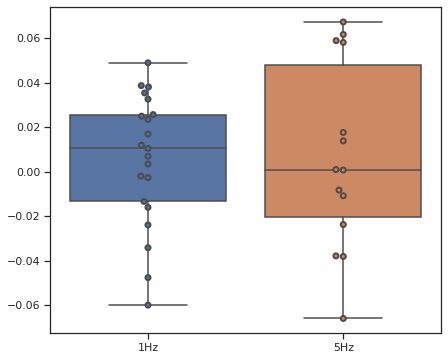

In [52]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))


sns.boxplot(data=df)

sns.swarmplot(data=df, linewidth=2)
# plt.savefig('AR')

In [53]:
tau_control = tau_filter('C',5,local_taus_mean)
wc_tau_control = tau_filter('C',5,tau_file)
tau_control = tau_control.replace([np.inf, -np.inf], np.nan)
tau_control = tau_control.dropna() 
wc_tau_control = wc_tau_control.replace([np.inf, -np.inf], np.nan) 
wc_tau_control = wc_tau_control.dropna() 
a = tau_control['transient1'][outliers(tau_control['transient1'])]
b = wc_tau_control['transient1'][outliers(wc_tau_control['transient1'])]
print(scipy.stats.ttest_ind(a,b))
print(scipy.stats.shapiro(b))

Ttest_indResult(statistic=-0.8759684835523056, pvalue=0.38580440478014877)
ShapiroResult(statistic=0.9832114577293396, pvalue=0.9528815746307373)


<AxesSubplot:>

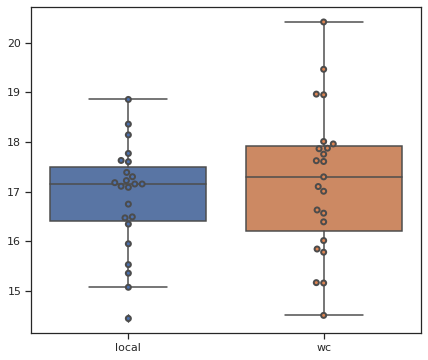

In [54]:
df = pd.concat ([a,b], axis=1, sort=False, keys=['local', 'wc'])
df
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))


sns.boxplot(data=df)

sns.swarmplot(data=df, linewidth=2)

## Correlación DI y tau

In [2]:
DI_control = pd.read_csv(path + 'DI_control.csv')

NameError: name 'pd' is not defined

In [56]:
wc5_control = df_list[1].mean(axis=1)
df_list[1]['transient_mean'] = wc5_control
tau5 = []
for i in range(0,len(DI_control['file'])):
    cel = DI_control['file'][i]
    filtro_wc5 = df_list[1][(df_list[1]['file'].str.contains(cel) == True)]
    tau5.append (filtro_wc5['transient_mean'].values)
DI_control['tau5'] = tau5

In [82]:
# del DI_control['DISCORDANCE 5 Hz'][8]
a = DI_control['DISCORDANCE 5 Hz'].tolist()

In [83]:
DI_control['tau5']

0         [0.0381651341359912]
1     [-0.0019402261314702806]
2        [0.08888776077451171]
3       [0.035493019148990154]
4        [0.02577173337525701]
5        [0.04903623288475456]
6       [0.023534384934705322]
7        [0.15355343544964564]
9                           []
11       [0.03879501163436529]
12       [0.01194706555430538]
13    [-0.0025834580394517087]
14      [0.010539100917271548]
15                          []
16      [-0.07723313493429168]
17      [0.007058284352724077]
18      [-0.03408086152463693]
19      [-0.04753127803176194]
20     [0.0035331202863739717]
21      [-0.01594526380413894]
Name: tau5, dtype: object

In [84]:
# del DI_control['tau5'][8]
b = [j for i in DI_control['tau5'].tolist() for j in i]

In [85]:
from scipy.stats.stats import pearsonr 
print (pearsonr(a,b))

(-0.0038265555957511174, 0.9879770293048443)


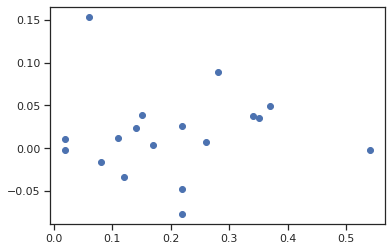

In [86]:
plt.scatter(a,b)

## Escalera de frecuencia y dosis / DI

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/'
file = 'DI_drogas_dosis.csv'

In [3]:
DI = pd.read_csv(path+file, sep= ';')

In [4]:
DI_control_1 = DI[(DI['tratamiento'] == 'control') & (DI['frecuencia'] == 1)]['DI'].mean()
DI_control_3 = DI[(DI['tratamiento'] == 'control') & (DI['frecuencia'] == 3)]['DI'].mean()
DI_control_4 = DI[(DI['tratamiento'] == 'control') & (DI['frecuencia'] == 4)]['DI'].mean()
DI_control_5 = DI[(DI['tratamiento'] == 'control') & (DI['frecuencia'] == 5)]['DI'].mean()
DI_vk_1 = DI[(DI['tratamiento'] == 'VK') & (DI['dosis'] == 5) & (DI['frecuencia'] == 1)]['DI'].mean()
DI_vk_3 = DI[(DI['tratamiento'] == 'VK') & (DI['dosis'] == 5) & (DI['frecuencia'] == 3)]['DI'].mean()
DI_vk_4 = DI[(DI['tratamiento'] == 'VK') & (DI['dosis'] == 5) & (DI['frecuencia'] == 4)]['DI'].mean()
DI_vk_5 = DI[(DI['tratamiento'] == 'VK') & (DI['dosis'] == 5) & (DI['frecuencia'] == 5)]['DI'].mean()
DI_Dan_1 = DI[(DI['tratamiento'] == 'Dan') & (DI['dosis'] == 5) & (DI['frecuencia'] == 1)]['DI'].mean()
DI_Dan_3 = DI[(DI['tratamiento'] == 'Dan') & (DI['dosis'] == 5) & (DI['frecuencia'] == 3)]['DI'].mean()
DI_Dan_4 = DI[(DI['tratamiento'] == 'Dan') & (DI['dosis'] == 5) & (DI['frecuencia'] == 4)]['DI'].mean()
DI_Dan_5 = DI[(DI['tratamiento'] == 'Dan') & (DI['dosis'] == 5) & (DI['frecuencia'] == 5)]['DI'].mean()

In [5]:
Error_DI_control_1 = scipy.stats.sem(DI[(DI['tratamiento'] == 'control') & (DI['frecuencia'] == 1)]['DI'])
Error_DI_control_3 = scipy.stats.sem(DI[(DI['tratamiento'] == 'control') & (DI['frecuencia'] == 3)]['DI'])
Error_DI_control_4 = scipy.stats.sem(DI[(DI['tratamiento'] == 'control') & (DI['frecuencia'] == 4)]['DI'])
Error_DI_control_5 = scipy.stats.sem(DI[(DI['tratamiento'] == 'control') & (DI['frecuencia'] == 5)]['DI'])
Error_DI_vk_1 = scipy.stats.sem(DI[(DI['tratamiento'] == 'VK') & (DI['dosis'] == 5) & (DI['frecuencia'] == 1)]['DI'])
Error_DI_vk_3 = scipy.stats.sem(DI[(DI['tratamiento'] == 'VK') & (DI['dosis'] == 5) & (DI['frecuencia'] == 3)]['DI'])
Error_DI_vk_4 = scipy.stats.sem(DI[(DI['tratamiento'] == 'VK') & (DI['dosis'] == 5) & (DI['frecuencia'] == 4)]['DI'])
Error_DI_vk_5 = scipy.stats.sem(DI[(DI['tratamiento'] == 'VK') & (DI['dosis'] == 5) & (DI['frecuencia'] == 5)]['DI'])
Error_DI_Dan_1 = scipy.stats.sem(DI[(DI['tratamiento'] == 'Dan') & (DI['dosis'] == 5) & (DI['frecuencia'] == 1)]['DI'])
Error_DI_Dan_3 = scipy.stats.sem(DI[(DI['tratamiento'] == 'Dan') & (DI['dosis'] == 5) & (DI['frecuencia'] == 3)]['DI'])
Error_DI_Dan_4 = scipy.stats.sem(DI[(DI['tratamiento'] == 'Dan') & (DI['dosis'] == 5) & (DI['frecuencia'] == 4)]['DI'])
Error_DI_Dan_5 = scipy.stats.sem(DI[(DI['tratamiento'] == 'Dan') & (DI['dosis'] == 5) & (DI['frecuencia'] == 5)]['DI'])

In [6]:
x = [1,3,4,5]
y1 = [DI_control_1, DI_control_3, DI_control_4, DI_control_5]
y2 = [DI_vk_1, DI_vk_3, DI_vk_4, DI_vk_5]
y3 = [DI_Dan_1, DI_Dan_3, DI_Dan_4, DI_Dan_5]

y1_err = [Error_DI_control_1, Error_DI_control_3, Error_DI_control_4, Error_DI_control_5]
y2_err = [Error_DI_vk_1, Error_DI_vk_3, Error_DI_vk_4, Error_DI_vk_5]
y3_err = [Error_DI_Dan_1, Error_DI_Dan_3, Error_DI_Dan_4, Error_DI_Dan_5]

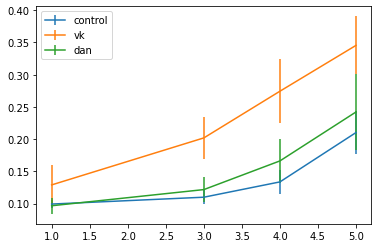

In [38]:
plt.errorbar (x, y1, yerr = y1_err)
plt.errorbar (x, y2, yerr = y2_err)
plt.errorbar (x, y3, yerr = y3_err)

plt.legend (['control','vk','dan'])
plt.savefig(path+'DI_treatment')

In [14]:
DI_control_1 = DI[(DI['tratamiento'] == 'control') & (DI['frecuencia'] == 1)]['DI']
DI_control_3 = DI[(DI['tratamiento'] == 'control') & (DI['frecuencia'] == 3)]['DI']
DI_control_4 = DI[(DI['tratamiento'] == 'control') & (DI['frecuencia'] == 4)]['DI']
DI_control_5 = DI[(DI['tratamiento'] == 'control') & (DI['frecuencia'] == 5)]['DI']
DI_vk_1 = DI[(DI['tratamiento'] == 'VK') & (DI['dosis'] == 5) & (DI['frecuencia'] == 1)]['DI']
DI_vk_3 = DI[(DI['tratamiento'] == 'VK') & (DI['dosis'] == 5) & (DI['frecuencia'] == 3)]['DI']
DI_vk_4 = DI[(DI['tratamiento'] == 'VK') & (DI['dosis'] == 5) & (DI['frecuencia'] == 4)]['DI']
DI_vk_5 = DI[(DI['tratamiento'] == 'VK') & (DI['dosis'] == 5) & (DI['frecuencia'] == 5)]['DI']
DI_Dan_1 = DI[(DI['tratamiento'] == 'Dan') & (DI['dosis'] == 5) & (DI['frecuencia'] == 1)]['DI']
DI_Dan_3 = DI[(DI['tratamiento'] == 'Dan') & (DI['dosis'] == 5) & (DI['frecuencia'] == 3)]['DI']
DI_Dan_4 = DI[(DI['tratamiento'] == 'Dan') & (DI['dosis'] == 5) & (DI['frecuencia'] == 4)]['DI']
DI_Dan_5 = DI[(DI['tratamiento'] == 'Dan') & (DI['dosis'] == 5) & (DI['frecuencia'] == 5)]['DI']

In [37]:
import itertools

a = [DI_Dan_1,DI_vk_1,DI_control_1]
b = [DI_Dan_3,DI_vk_3,DI_control_3]
c = [DI_Dan_4,DI_vk_4,DI_control_4]
d = [DI_Dan_5,DI_vk_5,DI_control_5]

for grupo in [a,b,c,d]:
    for i in range(0,3):
        combinatory = list(itertools.combinations(grupo, 2))
        w, p = scipy.stats.ttest_ind(combinatory[i][0],combinatory[i][1])
        print('p = ' + str(p))

p = 0.3432497610186268
p = 0.8414367433602383
p = 0.23716468047519892
p = 0.05326105008814979
p = 0.5737726290765912
p = 0.004525816473130678
p = 0.09695304744113079
p = 0.36712123504396843
p = 0.0052912949359410575
p = 0.18719657721400246
p = 0.6174783432013217
p = 0.028109239154036885


In [49]:
scipy.stats.f_oneway(y1,y2, y3)

F_onewayResult(statistic=2.1980619078325505, pvalue=0.1669879389062548)

In [4]:
DI_control = DI[(DI['tratamiento'] == 'control')]
DI_vk = DI[(DI['tratamiento'] == 'VK') & (DI['dosis'] == 5)]
DI_Dan = DI[(DI['tratamiento'] == 'Dan') & (DI['dosis'] == 5)]

In [6]:
DI_vk

,tratamiento,dosis,frecuencia,DI
88,VK,5,1,0.099460
89,VK,5,1,0.263063
90,VK,5,1,0.220870
91,VK,5,1,0.079648
92,VK,5,1,0.060913
93,VK,5,1,0.111184
94,VK,5,1,0.067603
95,VK,5,3,0.261952
96,VK,5,3,0.312396
97,VK,5,3,0.275692


In [61]:
pd.concat([DI_control,DI_vk,DI_Dan])
del DI['dosis']

In [62]:
DI

,tratamiento,frecuencia,DI
0,control,1,0.080000
1,control,1,0.098967
2,control,1,0.086409
3,control,1,0.145114
4,control,1,0.089151
...,...,...,...
123,VK,4,0.297547
124,VK,4,0.309959
125,VK,5,0.153050
126,VK,5,0.371868


In [66]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('DI ~ C(tratamiento) + C(frecuencia) + C(tratamiento):C(frecuencia)', data=DI).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(tratamiento),0.155196,2.0,9.832530,1.136106e-04
C(frecuencia),0.311719,3.0,13.166111,1.854783e-07
C(tratamiento):C(frecuencia),0.014693,6.0,0.310300,9.305145e-01
Residual,0.915468,116.0,NaN,NaN


In [7]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [10]:
tukey = pairwise_tukeyhsd(endog=DI['DI'],
                          groups=DI['tratamiento'],
                          alpha=0.05)

In [12]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
   Dan      VK   0.0579 0.0385  0.0024 0.1133   True
   Dan control  -0.0184 0.7001 -0.0747 0.0378  False
    VK control  -0.0763  0.001 -0.1236 -0.029   True
----------------------------------------------------
